<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO4/Proyecto4_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 4: Clasificación de señales ECG</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

#<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

#<b>Entregable</b>

##<h4><b>1. </b>Del artículo <b>[3]</b> hacer un resumen de la sección extracción de caracteríticas (<i>Features extraction</i>) y discutir desde el artículo u otras referencias cómo se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad.</h4>

<b>Feature extraction:</b> Los modelos computacionales con redes neuronales se han empleado exitosamente en la clasificación de diferentes tipos de arritmias, por medio de transformaciones secuenciales de los datos sin procesar a características que se entregan a un clasificador de regresión logística multinomial. Entrenar estos modelos requiere una basta cantidad de datos y tiempo de computación. Por otro lado, es posible extraer características de las señales ECG como magnitudes de picos, duraciones, distancias entre picos y su variabilidad en los componentes principales (ondas P, Q, T y el complejo QRS). Sin embargo, estas características no son suficientes para clasificar con precisión ciertos tipos de arritmias, especialmente aquellas donde los componentes se distorisionan o están ausentes.

En consecuencia surgen retos para la extracción de características como la variabilidad en la morfología de onda y la distorsion causada por diversas condiciones, además de las variaciones en amplitud y frecuencia relacionadas con edad, sexo y raza. Por ello, se realizó un procesamiento preliminar de los datos, implementando un escalado de los valores de la señal para unificar la escala de amplitud entre todos los sujetos.

Para mejorar la extracción de características, el artículo presenta un método que incluye 11 características básicas y 39,830 más exhaustivas, además de incluir la edad y el género debido a su relevancia en los análisis médicos. También se incorporan características como la media y varianza de los intervalos RR, que solo se pueden calcular en el los registros de la derivación II de ECG. Se describe en detalle la medición de la prominencia, altura, y anchura de los picos y valles en las señales de ECG, utilizando una distribución empírica de frecuencias. Esta distribución se basa en una tabla para transformar las características en frecuencias uniformes y poder usarlas en un modelo de clasificación. El grupo de características para la derivación II incluye 900 frecuencias para los picos y valles, 600 para las diferencias de ubicación, y 1800 para las diferencias en las proporciones entre altura, anchura y prominencia. Este enfoque de extracción de características revela completamente la distribución de frecuencias empíricas de las ondas P, Q, R, S y T, y sus segmentos, resultando en una estrategia confiable y robusta para la identificación de ritmos en el ECG, incluso para casos donde desaparecen ondas PQRS debido a ciertas enfermedades.</h4>

##<h4><b>2. </b>Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección.</h4>
<h4>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>). Esta información está en el archivo <i>Diagnostics.xlsx</i>. De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.</h4>



Se seleccionó la base de datos filtrada por los autores debido a que ofrece señales procesadas de manera profesional y ha sido utilizada en el artículo de referencia <b>[3]</b>. Es casi seguro que el filtrado de la base de datos implementado por los autores contara con un flujo de procesamiento más eficiente y métodos más avanzados, en comparación con los implementados en el Proyecto 3. Además, la aplicación de la transformada wavelet en el proyecto anterior se fundamentó en fuentes bibliográficas independientes de la base de datos empleada, lo que podría haber resultado en una selección subóptima para las características específicas de las señales estudiadas. Esto probablemente afectó la calidad e idoneidad de las señales para el entrenamiento de modelos predictivos significativos.<br><br>

Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1ccO3RDMkQvqxwUoczbcySHRpEvm_2Gr_?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats

ruta_SB = '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Cantidad archivos = 5669


Se definen funciones para la normalización de las señales ECG usadas en proyectos previos que se aplicarán en la etapa de procesamiento, con el fin de adecuar los datos para el modelo a entrenar, evitar errores en la interpretabilidad de los mismos y simplificar su representación.

In [ ]:
from scipy.signal import detrend

def pre_process(signal):
  signal = np.array(signal)
  signal_detrended = detrend(signal)
  x_min = np.min(signal_detrended)
  x_max = np.max(signal_detrended)
  signal_normalized = (signal_detrended - x_min) / (x_max - x_min)

  return signal_normalized

Dado que se optó por utilizar la base de datos filtrada por los autores, fue necesario recalcular las frecuencias de máxima potencia (fMP) específicas para las señales del estudio original. Utilizar las frecuencias obtenidas en el Proyecto 3 habría resultado incompatible, ya que el flujo de filtrado y los métodos de procesamiento aplicados fueron diferentes. Por ello, se decidió emplear las señales filtradas trabajadas en el Proyecto 2, pero con los métodos de análisis frecuencial del Proyecto 3, específicamente el Periodograma de Welch.

En la selección del ancho de ventana para determinar el Periodograma de Welch en el Proyecto 3 se tuvo en cuenta la resolución de frecuencia adecuada para las señales ECG de la base de datos. Considerando que el rango general de frecuencias de ECG se encuentra entre 0.5 Hz y 150 Hz <b>[5]</b>, el ancho de ventana se calcula de la siguiente manera:

<h4>$nperseg = \frac{f_s}{f_{min \: ECG}} = \frac{500}{0.5}=1000$</h4>

Basándose en los tamaños de ventana más comunes, se optó por un valor de 1024 que es una potencia de dos y es el más cercano al valor calculado a partir de la fórmula que relaciona la frecuencia de muestreo y resolución mínima de frecuencia.

In [ ]:
def frecuencia_max_potencia_welch(signal_data, fs):
    freqs, potencia = signal.welch(signal_data, fs, nperseg=1024)
    idx_max = np.argmax(potencia)
    freq_max = freqs[idx_max]
    pot_max = potencia[idx_max]

    return freq_max, pot_max, freqs, potencia

##<h4><b>3. </b>Hacer un minitutorial del uso de la herramienta <i>NeuroKit</i> orientado al análisis de señales ECG.</h4>

En el siguiente <a href="https://colab.research.google.com/drive/1SpqfKQ0kLXfAtIgpbfs_bFb5r2YKGbbP?usp=sharing" target="_blank">enlace</a> se presenta el tutorial de la herramienta de Neurokit. Se desarrolló en un notebook separado para evitar extender la longitud y peso del notebook principal del proyecto.

##<h4><b>4. </b>Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3.</h4>

In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 11.3 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
import os

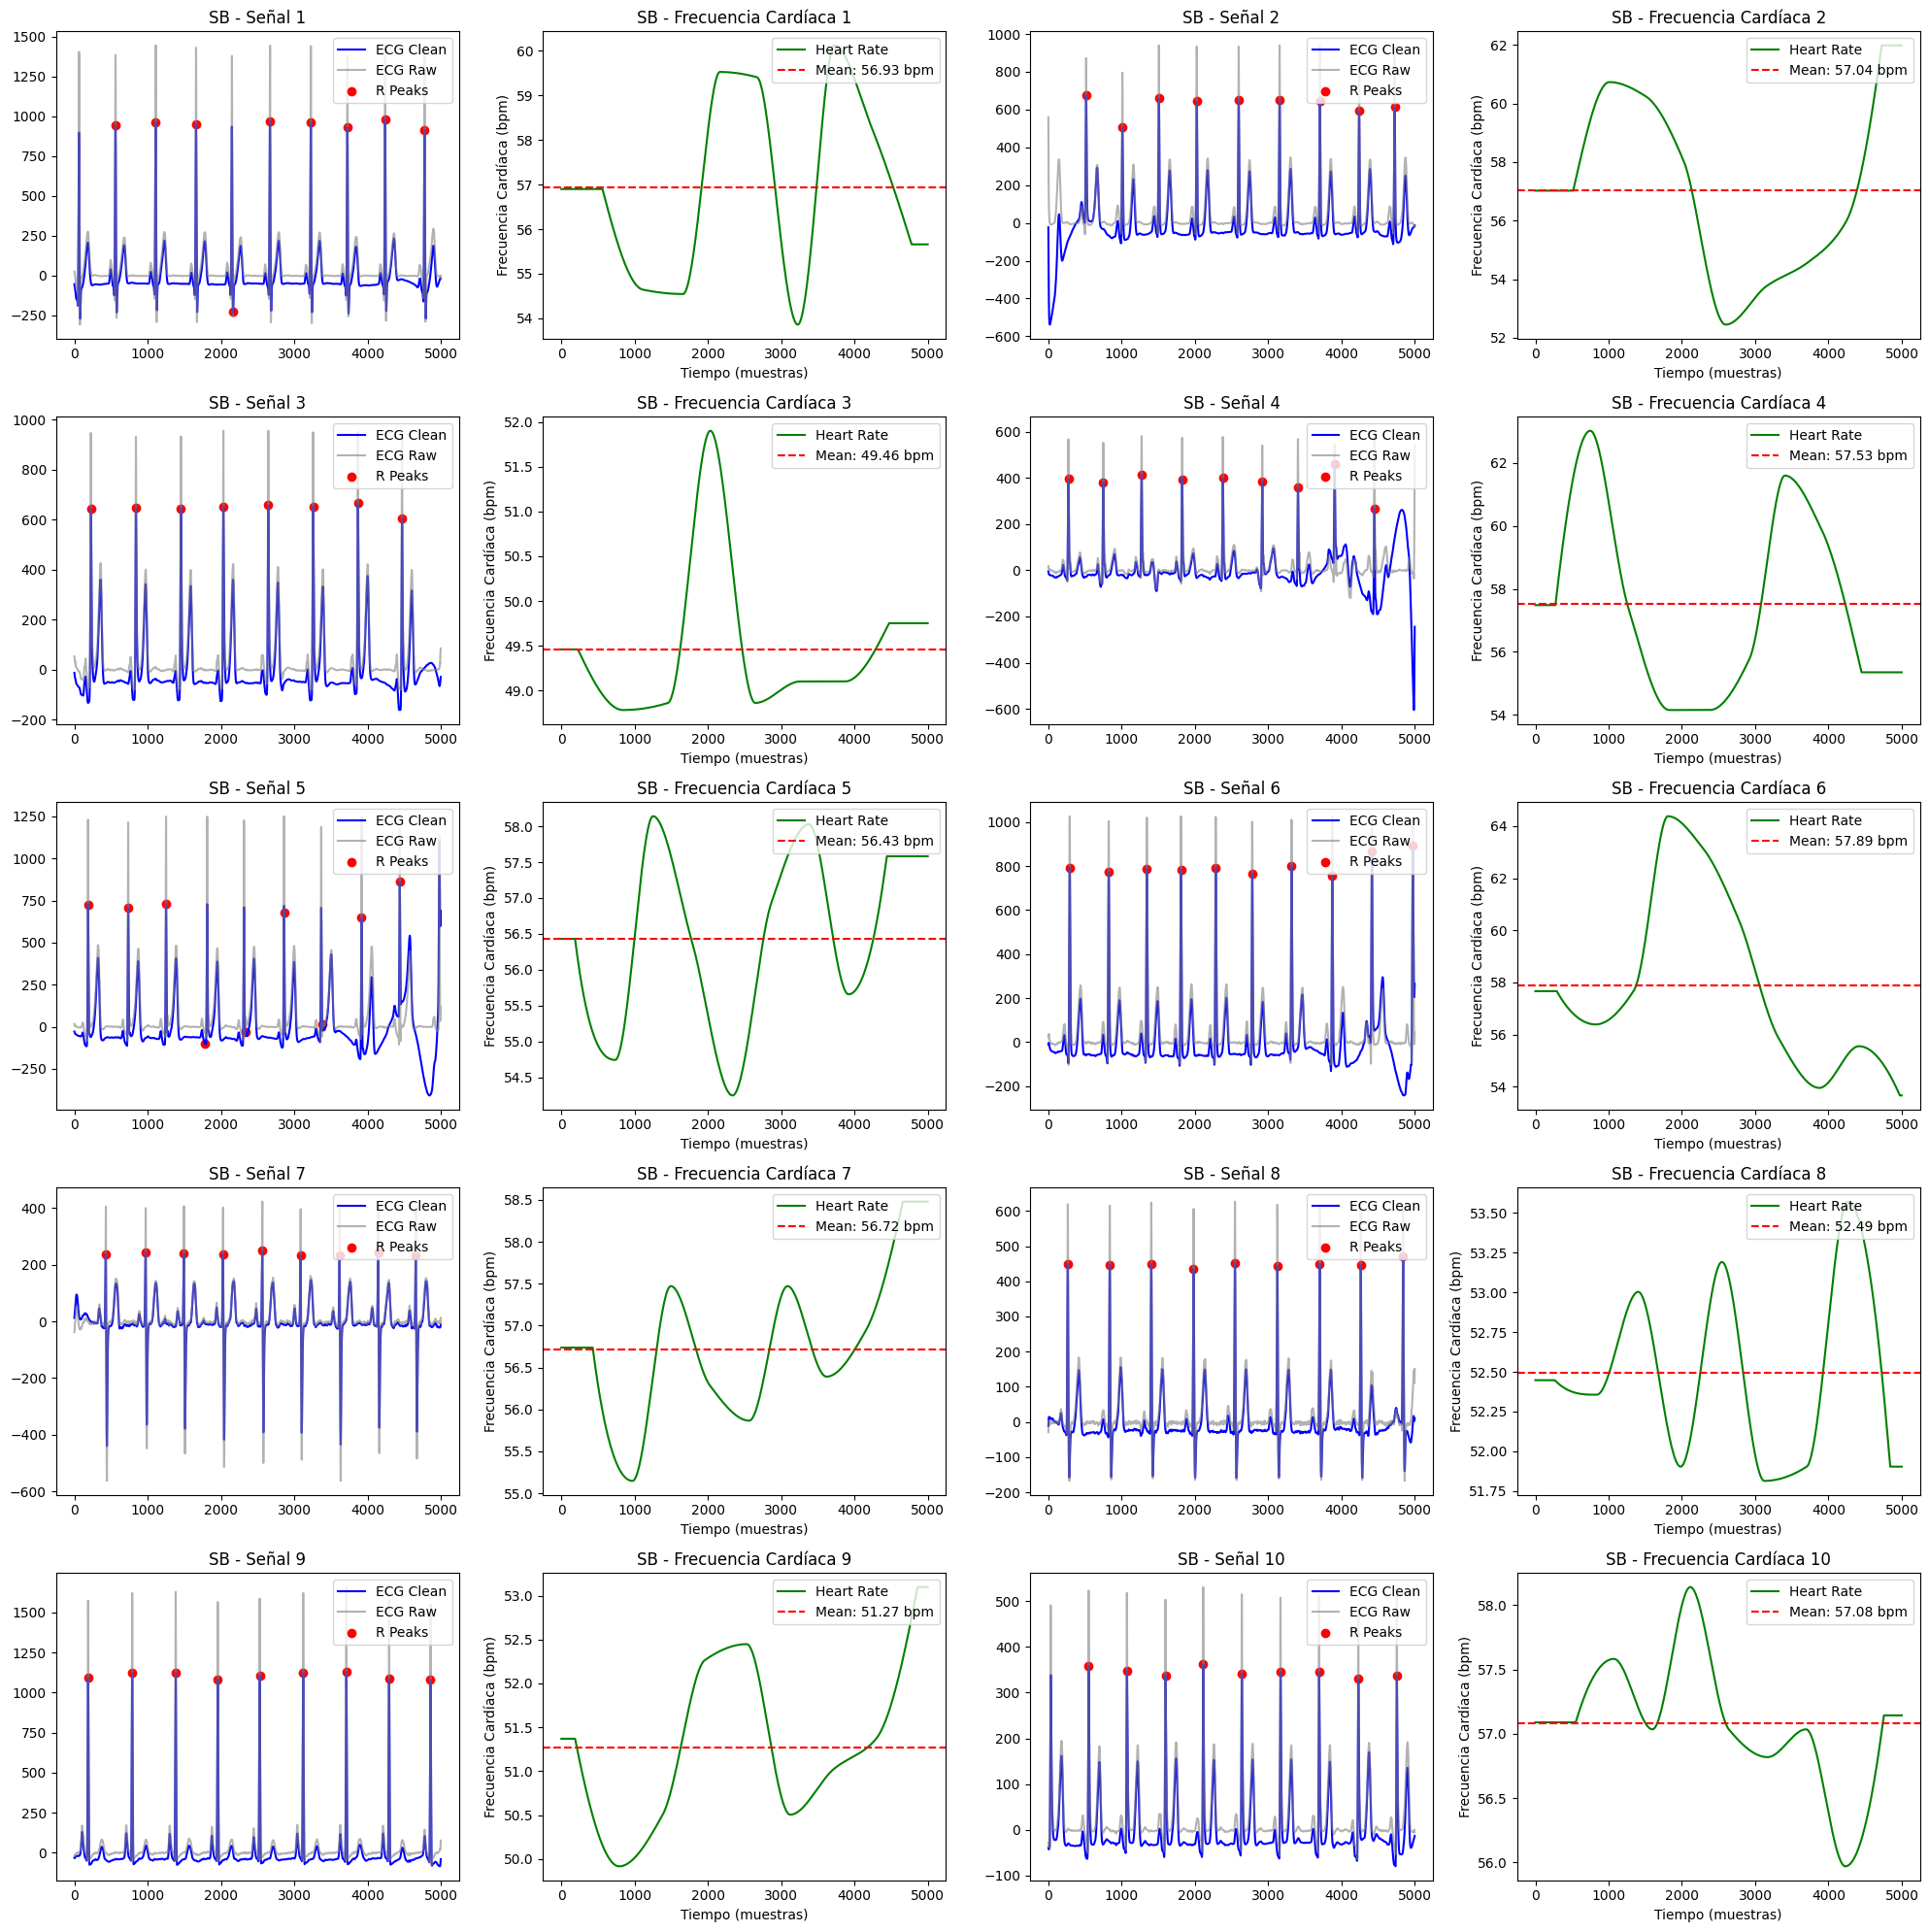

In [ ]:
ruta_SB = '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')[:10]

ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')[:10]
def procesar_ecg(filepath):
    try:
        datos = pd.read_csv(filepath, header=None, names=['ECG'])
        signal_ekg = datos['ECG'].values
        signals, info = nk.ecg_process(signal_ekg, sampling_rate=500, method='neurokit')
        return signal_ekg, signals, info
    except Exception as e:
        print(f"Error procesando archivo {filepath}: {e}")
        return None, None, None

def graficar_ecg_y_frecuencia(lista_archivos, titulo):
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))  # Crear subplots para ECG y frecuencia
    axes = axes.reshape(5, 2, 2)  # Organizar los ejes en pares (ECG, Frecuencia)
    for i, archivo in enumerate(lista_archivos):
        if i >= 10:
            break

        signal_ekg, signals, info = procesar_ecg(archivo)
        if signals is not None and info is not None:
            rpeaks = info['ECG_R_Peaks']
            heart_rate = nk.ecg_rate(rpeaks, sampling_rate=500, desired_length=len(signals['ECG_Clean']))
            average_rate = np.mean(heart_rate)
            row, col = divmod(i, 2)
            # picos R
            ax_ecg = axes[row, col, 0]
            ax_ecg.plot(signals['ECG_Clean'], label='ECG Clean', color='blue')
            ax_ecg.plot(signals['ECG_Raw'], label='ECG Raw', alpha=0.6, color='gray')
            ax_ecg.scatter(rpeaks, signals['ECG_Clean'][rpeaks], color='red', label='R Peaks')
            ax_ecg.set_title(f'{titulo} - Señal {i + 1}')
            ax_ecg.legend(loc='upper right')
            # Frecuencia Cardiaca
            ax_hr = axes[row, col, 1]
            ax_hr.plot(heart_rate, label='Heart Rate', color='green')
            ax_hr.axhline(y=average_rate, color='red', linestyle='--', label=f'Mean: {average_rate:.2f} bpm')  # Línea horizontal para el promedio
            ax_hr.set_title(f'{titulo} - Frecuencia Cardíaca {i + 1}')
            ax_hr.set_xlabel('Tiempo (muestras)')
            ax_hr.set_ylabel('Frecuencia Cardíaca (bpm)')
            ax_hr.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
graficar_ecg_y_frecuencia(lista_archivos_SB, "SB")


Al aplicar el tutorial de forma simplificada a los primeros 10 datos del grupo SB, se lograron delimitar los picos R y calcular el promedio de la frecuencia cardíaca. Aunque se identificaron errores en la ubicación de algunos picos en ciertas muestras, estas desviaciones no se consideran suficientemente significativas como para afectar el desempeño de los procesos posteriores en el modelo. En general, la mayoría de los picos se detectaron correctamente. Además, la inclusión de la frecuencia cardíaca promedio como característica proporciona información adicional que contribuye a mejorar la precisión de las predicciones.

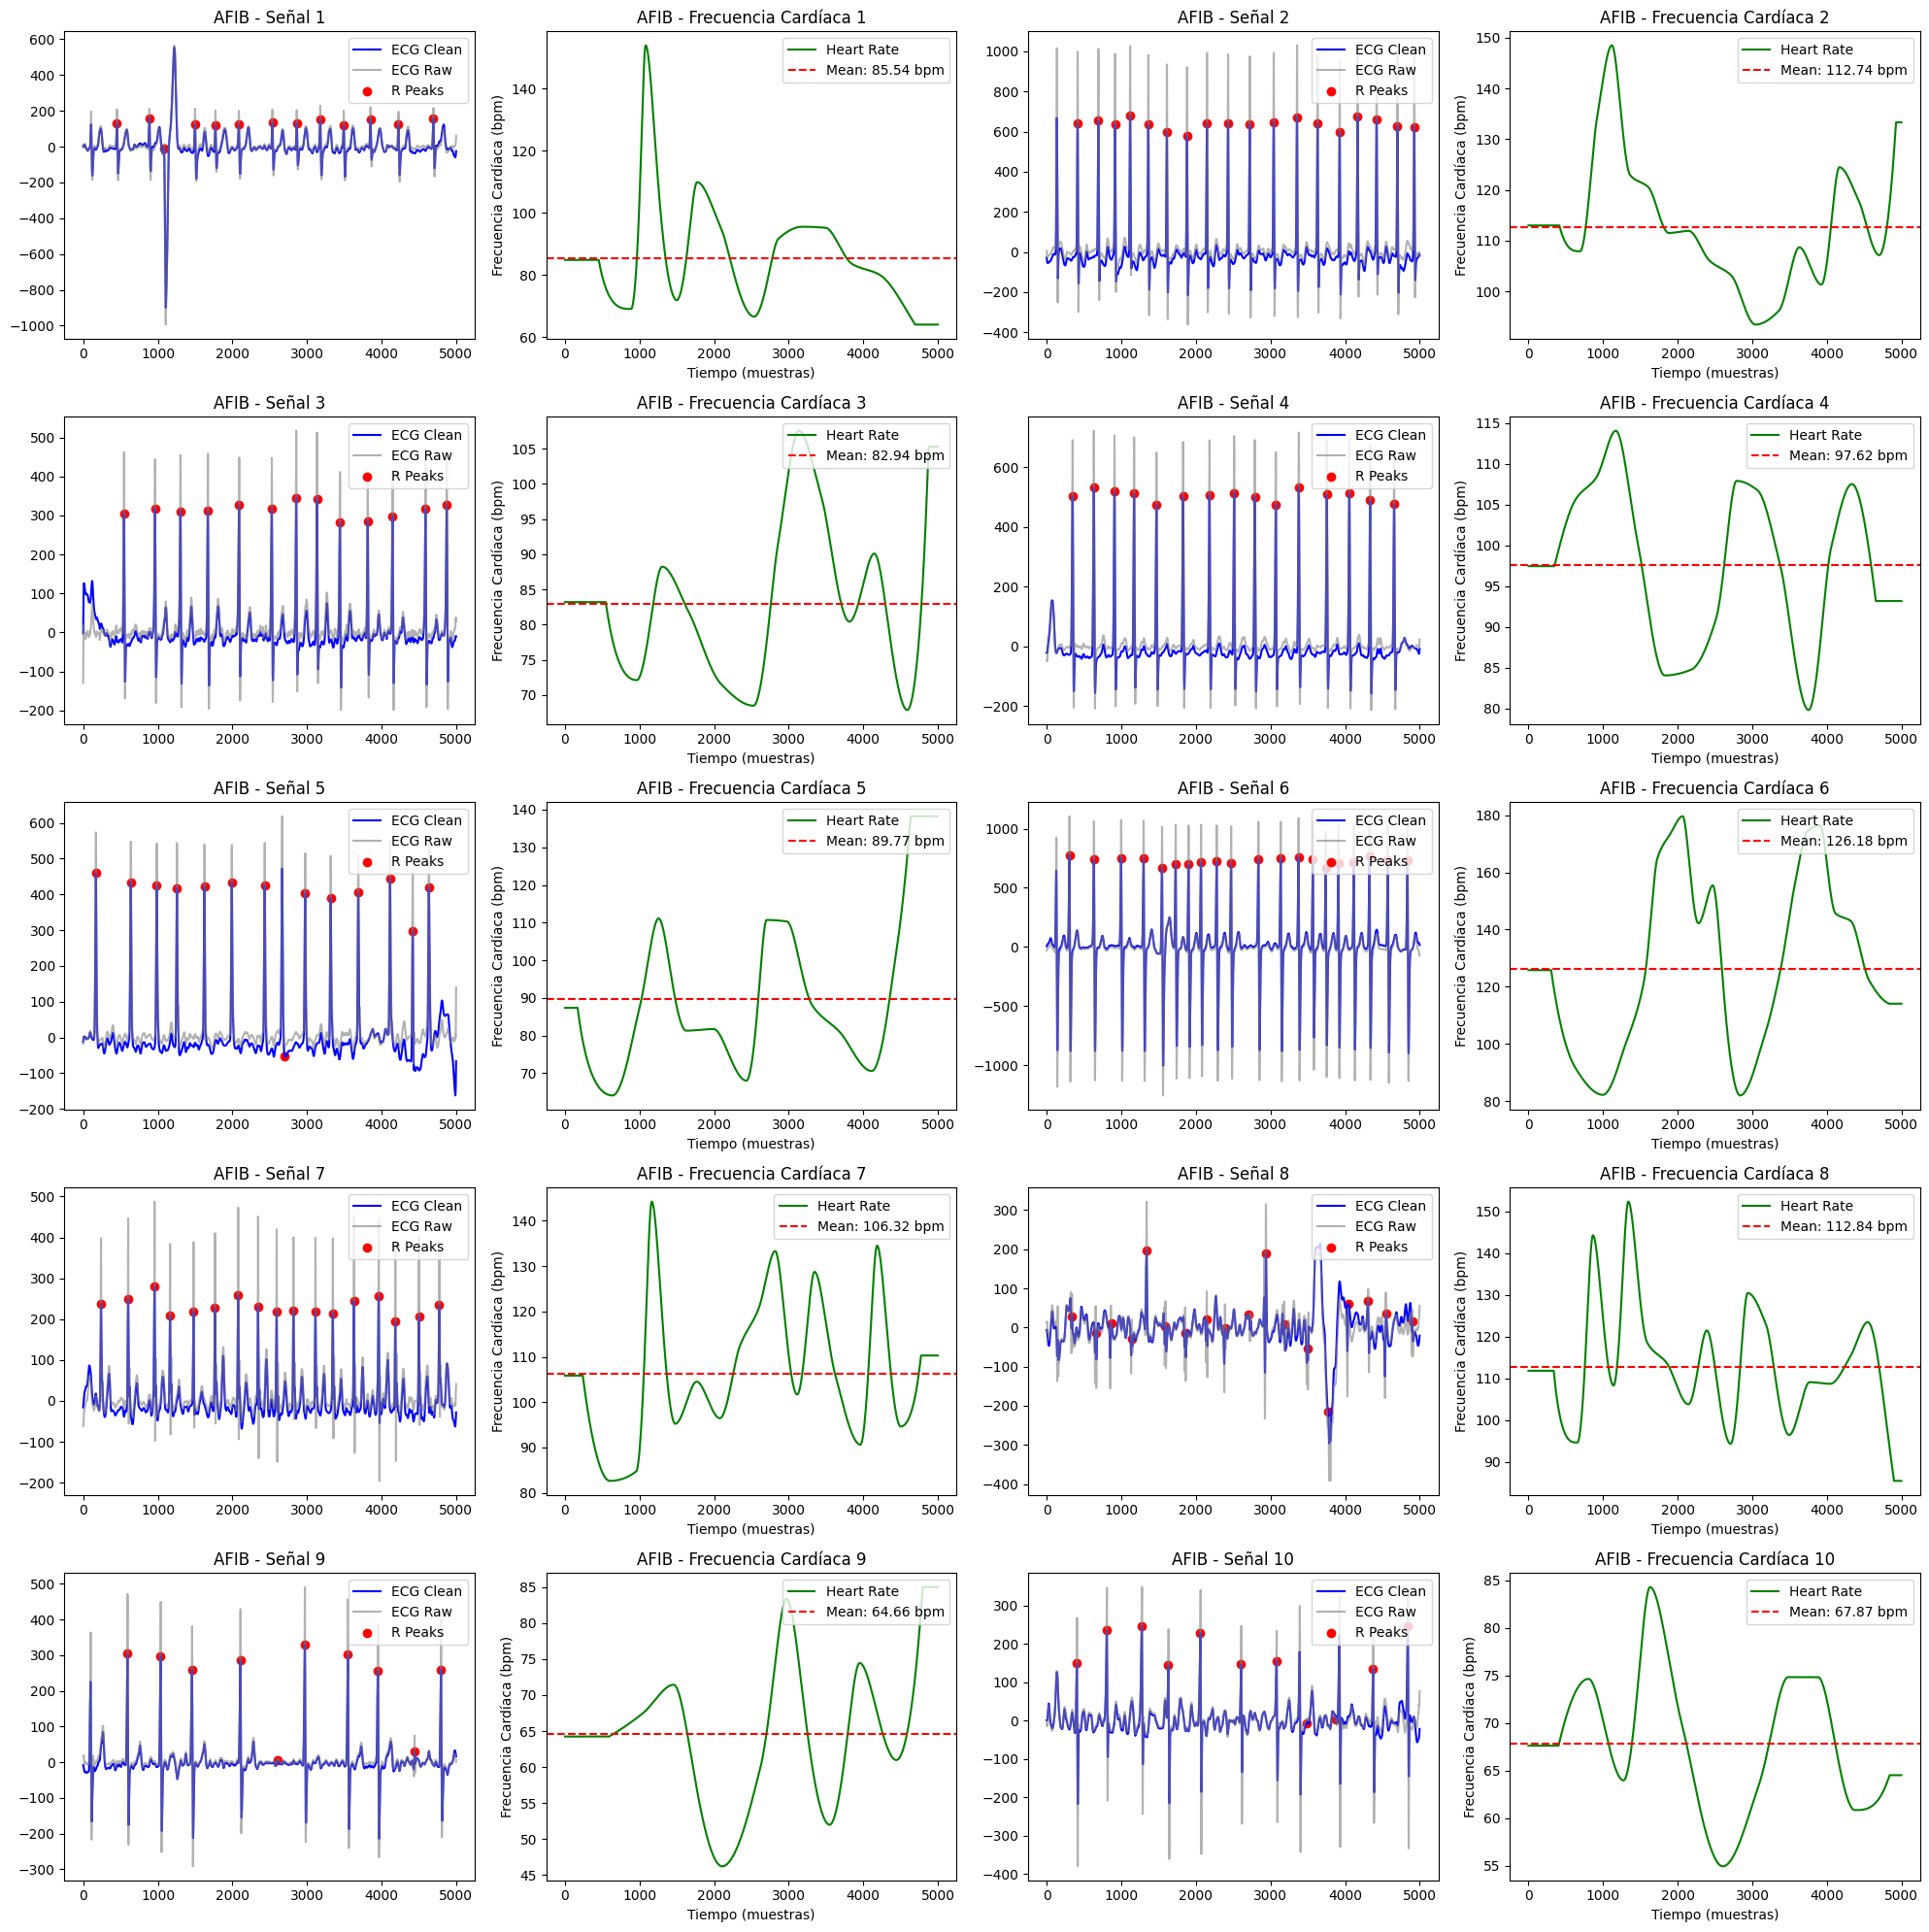

In [ ]:
graficar_ecg_y_frecuencia(lista_archivos_AFIB, "AFIB")

Para las señales del grupo AFIB, se graficaron las mismas características extraídas mediante las funciones de Neurokit, como los picos R y la frecuencia cardíaca promedio. Al igual que en el grupo SB, se identificaron algunas inconsistencias en la ubicación de los picos máximos, aunque estas pueden considerarse despreciables.  

Al comparar la frecuencia cardíaca promedio entre ambos grupos, se observan valores inferiores en el grupo SB en contraste con el grupo AFIB. Estas diferencias son coherentes desde un punto de vista fisiológico: en la bradicardia sinusal (SB), la frecuencia cardíaca disminuye debido a una disfunción en el nodo sinusal y un posible bloqueo auriculoventricular. Por otro lado, en la fibrilación auricular (AFIB), el ritmo cardíaco es irregular y acelerado, producto de una descoordinación eléctrica entre las aurículas y los ventrículos <b>[8,9]</b>.

##<h4><b>5. </b>Con las características que extrae el neurokit y las discutidas en el punto 1, generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3. No incluir más de 15 características ni menos de 5 y justificar la selección.</h4>

Para la definición de las características o variables descriptivas, se seleccionó una cantidad equitativa de registros de cada grupo poblacional (SB y AFIB). Como el grupo SB cuenta con un mayor número de registros, estos se limitaron al máximo de registros para el grupo AFIB. Este enfoque de balancear las muestras entre grupos representa un primer paso para mitigar el sesgo en el modelo.

El dataset final consta de 3555 filas y 13 columnas. Las filas representan los registros totales de ambos grupos, con 1780 muestras seleccionadas de cada grupo, descartando 5 debido a incompatibilidades con las funciones del módulo NeuroKit para detectar los componentes PQRS en la señal.

En cuanto a las columnas:
- La columna 'filepath' contiene los nombres asignados a cada registro en el estudio.  
- La columna 'patología' indica el grupo correspondiente y actúa como la variable objetivo o <b>target</b>.  
- Las demás 11 columnas representan variables descriptivas que servirán para estructurar el modelo. Se espera que estas variables tengan un nivel de significancia suficiente para contribuir a la construcción de un modelo predictivo preciso.<br><br>

La relación entre características y muestras cumple con la regla de que el número de muestras debe ser al menos 10 veces mayor que la cantidad de características. Al tener 3555 muestras aumentan las expectativas de obtener resultados más precisos por la basta cantidad de datos disponibles para el entrenamiento. Este volumen de datos garantiza además un margen suficiente para destinar un conjunto reservado para la prueba y validación del modelo.

<b>Elección de características:</b>

De la base de datos ‘Diagnostics’ se extraen características demográficas como son edad y género, las cuáles son relevantes para el diagnóstico de las patologías cardíacas como se indica en la literatura; la AFIB suele presentarse más comúnmente en hombres, y en adultos mayores. Por otro lado, la SB puede presentarse en adultos mayores como una patología y en  jóvenes atletas <b>[6,7]</b>.

De esta base de datos también se extraen otras dos características relevantes para el análisis como son la frecuencia ventricular y la frecuencia auricular, las cuales son métricas relevantes en el análisis de electrocardiogramas (ECG), especialmente en el contexto de arritmias como la bradicardia sinusal (SB) y la fibrilación auricular (AFIB). La frecuencia ventricular mide la cantidad de contracciones ventriculares por minuto. Es un indicador crítico para evaluar el ritmo cardíaco general y su regularidad. En condiciones normales debe estar entre 60 y 100 latidos por minuto (lpm). Una frecuencia inferior (bradicardia) puede ser sintomática en SB, mientras que una frecuencia irregular y rápida es común en AFIB. De manera paralela se tiene la frecuencia auricular(contracciones de las aurículas, que son críticas en condiciones donde no se sincronizan con los ventrículos), es relevante en este estudio debido a que en patologías como la  AFIB las aurículas tienen una actividad eléctrica caótica y una frecuencia auricular muy elevada (300-600 impulsos por minuto), mientras que en SB es un ritmo organizado, donde las aurículas laten a frecuencias normales <b>[8,9]</b>.

<b>Características extraídas de Neurokit:</b>

- <b>Frecuencia cardíaca media (mean_hr) y desviación estándar (std_hr):</b> Indicadores clave de la regularidad del ritmo. La AFIB se caracteriza por alta variabilidad, mientras que el SB presenta una frecuencia más baja y estable.

- <b>Número de latidos (num_beats):</b> Refleja la actividad general del ritmo cardíaco; un menor número es típico en SB.

- <b>Intervalo RR medio (intervalo_rr_medio):</b> Derivado de la frecuencia cardíaca, muestra la regularidad entre ciclos; el SB tiende a tener intervalos más largos, mientras que la AFIB es irregular.

- <b>Número de picos P (num_p_peaks):</b> Los picos P representan la actividad auricular; en la AFIB pueden estar ausentes o ser irregulares, mientras que en el SB son regulares.

- <b>Promedio del intervalo P-P (avg_p_interval):</b> Refleja la consistencia en la actividad auricular; intervalos irregulares son típicos de AFIB, mientras que SB presenta intervalos uniformes <b>[10,12]</b>.




In [ ]:
ruta_SB = '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')[:1780]

ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')[:1780]

data_ecg_metrics = []
def procesar_ecg(filepath):
    try:
        datos = pd.read_csv(filepath, header=None, names=['ECG'])
        signal_ekg = datos['ECG'].values
        signal_ekg = pre_process(signal_ekg)
        signals, info = nk.ecg_process(signal_ekg, sampling_rate=500, method='neurokit')
        freq_max, pot_max, _, _ = frecuencia_max_potencia_welch(signal_ekg, fs=500)

        #Extraer características
        peaks = signals['ECG_R_Peaks']
        rate = signals['ECG_Rate']
        p_peaks = info['ECG_P_Peaks']  #Picos de la onda P
        p_peaks_validos = [p for p in p_peaks if not np.isnan(p)]
        if len(p_peaks_validos) > 1:  #Se necesitan mínimo dos picos para calcular intervalos
            p_intervals = np.diff(p_peaks_validos)  #Diferencia entre picos consecutivos
            p_intervals_avg = np.mean(p_intervals)  #Promedio de los intervalos P-P
        else:
            p_intervals_avg = np.nan  #Si no hay suficientes picos se retorna NaN

        # Calcular métricas
        basic_metrics = {
            'filepath': filepath,
            'mean_hr': np.mean(rate),
            'std_hr': np.std(rate),
            'num_beats': np.sum(peaks),
            'intervalo_rr_medio': 60 / np.mean(rate) if np.mean(rate) > 0 else np.nan,
            'num_p_peaks': len(p_peaks_validos),
            'avg_p_interval': p_intervals_avg/500 ,
            'fMP': freq_max
        }
        return basic_metrics

    except Exception as e:
        print(f"Error procesando archivo {filepath}: {e}")
        return None

for archivo in lista_archivos_SB:
    resultado = procesar_ecg(archivo)
    if resultado:
        archivo_relativo = os.path.relpath(archivo, start='/content/drive/MyDrive/ECGDataDenoised/SB/')
        archivo_sin_extension = os.path.splitext(archivo_relativo)[0]
        resultado['filepath'] = archivo_sin_extension
        resultado['patologia'] = 'SB'
        data_ecg_metrics.append(resultado)

for archivo in lista_archivos_AFIB:
    resultado = procesar_ecg(archivo)
    if resultado:
        archivo_relativo = os.path.relpath(archivo, start='/content/drive/MyDrive/ECGDataDenoised/AFIB/')
        archivo_sin_extension = os.path.splitext(archivo_relativo)[0]
        resultado['filepath'] = archivo_sin_extension
        resultado['patologia'] = 'AFIB'
        data_ecg_metrics.append(resultado)

df_ecg_metrics = pd.DataFrame(data_ecg_metrics)

In [ ]:
df_ecg_metrics

In [ ]:
ruta_data_diag = '/content/drive/MyDrive/ECGDataDenoised/ECG_DIAGNOSTICS.xlsx'
df_diag = pd.read_excel(ruta_data_diag)

In [ ]:
df_ecg_metrics2=df_ecg_metrics.copy()
f_diag = df_diag[['FileName', 'PatientAge', 'Gender', 'VentricularRate', 'AtrialRate']]

#Se realiza un merge entre df_diag y df_ecg_metrics usando 'FileName' y 'filepath'
df_ecg_metrics2 = pd.merge(df_ecg_metrics2, f_diag, left_on='filepath', right_on='FileName', how='left')

df_ecg_metrics2 = df_ecg_metrics2.drop(columns=['FileName'])
df_ecg_metrics2

No es necesario correr este procesamiento, ya que el dataframe final quedó guardado en la siguiente ubicación con el fin de ahorrar recursos computacionales: '/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv'

In [ ]:
#ruta_guardado = '/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv'
#df_ecg_metrics2.to_csv(ruta_guardado, index=False)

##<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe con las siguientes columnas:</h4>

> * <h4>Registro</h4>
* <h4>Estado</h4>
* <h4>Característica 1</h4>
* <h4>Característica 2</h4><h4>...</h4>
* <h4>Característica N</h4>

Como se definió en el numeral anterior el dataframe, solo es necesario resubirlo y reestructurarlo.

In [ ]:
data_final = pd.read_csv('/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv')
data_final = data_final.rename(columns={"filepath": "Registro", "patologia": "Estado"})
columnas = data_final.columns.to_list()
columnas.insert(1, columnas.pop(columnas.index("Estado")))
columnas.insert(2, columnas.pop(columnas.index("fMP")))
data_final = data_final[columnas]

data_final

,Registro,Estado,fMP,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,PatientAge,Gender,VentricularRate,AtrialRate
0,MUSE_20180113_073928_00000,SB,0.976562,56.930448,1.878494,9,1.053918,9,1.054750,20,MALE,57,57
1,MUSE_20180114_130415_72000,SB,2.929688,57.038183,2.888745,9,1.051927,9,1.052000,36,MALE,57,57
2,MUSE_20180113_073605_76000,SB,0.976562,49.456334,0.776271,8,1.213191,7,1.210667,42,MALE,49,49
3,MUSE_20180118_180639_23000,SB,3.417969,57.526065,2.817997,9,1.043005,9,1.043000,41,FEMALE,57,62
4,MUSE_20180113_132904_79000,SB,0.976562,56.433646,1.147592,9,1.063196,8,1.059714,24,MALE,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,MUSE_20180712_155925_33000,AFIB,3.906250,119.264774,22.018157,18,0.503082,16,0.545333,60,MALE,115,85
3551,MUSE_20180118_124624_57000,AFIB,3.417969,68.099708,5.952689,11,0.881061,11,0.881600,69,MALE,67,82
3552,MUSE_20180118_131302_32000,AFIB,1.953125,111.989238,15.167493,18,0.535766,18,0.531765,85,MALE,111,67
3553,MUSE_20180113_125836_16000,AFIB,10.742188,78.053042,10.542701,12,0.768708,12,0.767818,70,MALE,78,227


##<h4><b>7. </b>Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas de una red neuronal que permita la clasificación de las dos patologías cardiacas.</h4>

Se importan módulos para la escalar los datos y determinar los hiperparámetros adecuados para el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

Se crea una copia del dataframe original para no modificarlo y sobre esta copia se hace one-hot encoding (codificación numérica) de los datos categóricos, como el género y la patología o estado (variable target). Se elimina la columna 'Registro' porque no está relacionada con las variables descriptivas que se entregarán al modelo.

In [ ]:
# Crear una copia del DataFrame original
df_final = data_final.copy()

df_final['Estado'] = df_final['Estado'].map({'SB': 0, 'AFIB': 1})
df_final['Gender'] = df_final['Gender'].map({'MALE': 0, 'FEMALE': 1})

predictors = list(set(df_final.columns) - {'Registro', 'Estado'})
predictors_numericos = df_final[predictors].select_dtypes(include=['number']).columns
df_final[predictors_numericos] = df_final[predictors_numericos] / df_final[predictors_numericos].max()
df_final.describe()

,Estado,fMP,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,PatientAge,Gender,VentricularRate,AtrialRate
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3554.000000,3555.000000,3555.000000,3555.000000,3555.000000
mean,0.499578,0.072199,0.427879,0.207212,0.421136,0.478598,0.489643,0.306761,0.672037,0.385935,0.334291,0.179482
std,0.500070,0.054014,0.151055,0.200465,0.146211,0.137497,0.124413,0.072129,0.150020,0.486884,0.124895,0.146370
min,0.000000,0.009804,0.184895,0.001264,0.137931,0.184895,0.000000,0.144343,0.132653,0.000000,0.151111,0.000000
25%,0.000000,0.039216,0.313765,0.022538,0.310345,0.353383,0.409091,0.244136,0.571429,0.000000,0.248889,0.102804
50%,0.000000,0.068627,0.350320,0.171925,0.344828,0.527789,0.454545,0.332456,0.683673,0.000000,0.262222,0.110280
75%,1.000000,0.078431,0.523214,0.351579,0.517241,0.589279,0.590909,0.354404,0.785714,1.000000,0.404444,0.194393
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Se elimina un registro de paciente que contenía datos NaN, con el fin de evitar confusiones en el modelo.

In [ ]:
df_final_clean = df_final.dropna(subset=predictors_numericos)
print(f"Total pacientes antes: {df_final.shape[0]}")
print(f"Total pacientes después de eliminar NaN: {df_final_clean.shape[0]}")

Total pacientes antes: 3555
Total pacientes después de eliminar NaN: 3554


Se importan otros módulos para dividir el set de datos en entrenamiento y testeo, así como para crear el modelo de clasificación y evaluar su desempeño.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

Se divide el set de datos en una proporción de 70% para entrenamiento y 30% para testeo. Esta proporción es ampliamente utilizada en modelos predictivos, debido a que proporciona un equilibrio entre aprendizaje y evaluación. Garantiza suficiente información para identificar patrones significativos, mientras que reserva un conjunto representativo para evaluar su capacidad de generalización, minimizando así riesgos de sobreajuste. Además, es un estándar común en la investigación y práctica, especialmente con conjuntos de datos medianos o grandes, y puede complementarse con validación cruzada para optimizar el rendimiento en caso de conjuntos de datos más pequeños.

El parámetro `random_state` se establece en uno de los valores más comúnmente utilizados como estándar y actúa como una semilla para el generador de números aleatorios. Esto asegura la reproducibilidad de la división de los datos, permitiendo obtener los mismos resultados en ejecuciones posteriores.

La definición del argumento `stratify=y` garantiza un balanceo de las diferentes clases que puede presentar la variable target, en este caso SB y AFIB. Esto es importante para evitar un modelo sesgado.

In [ ]:
X = df_final_clean[predictors_numericos].values
y = df_final_clean['Estado'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Inicialmente, se realizaron pruebas de entrenamiento del modelo utilizando hiperparámetros seleccionados aleatoriamente, basándose en las configuraciones estándar para la complejidad de los datos de estudio. Se varió el número de capas y neuronas, mientras que se mantuvo constante la función de activación (ReLU) y el optimizador (adam - Adaptive Moment Estimation), con un límite de 1000 iteraciones, tomando en cuenta las limitaciones de recursos computacionales y evitando el sobreentrenamiento, además de que la convergencia de resultados generalmente se alcanza en un número menor de iteraciones.


=== Resultados para el Modelo 1 (3 capas de 8 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.98      0.98      0.98      1245
        AFIB       0.98      0.98      0.98      1242

    accuracy                           0.98      2487
   macro avg       0.98      0.98      0.98      2487
weighted avg       0.98      0.98      0.98      2487


Validación (Prueba):
              precision    recall  f1-score   support

          SB       0.97      0.97      0.97       534
        AFIB       0.97      0.97      0.97       533

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067


=== Resultados para el Modelo 2 (2 capas de 16 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.98      0.99      0.98      1245
        AFIB       0.99      0.98      0.98      1242

    acc

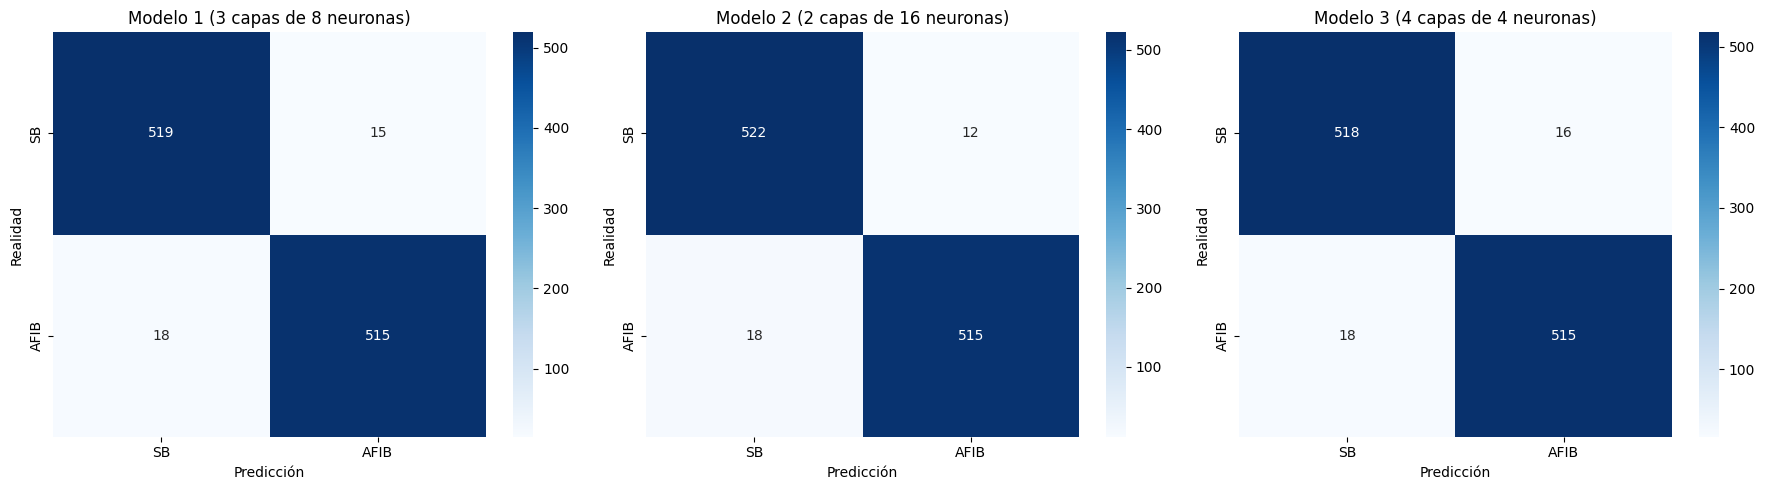

In [ ]:
models = {
    'Modelo 1 (3 capas de 8 neuronas)': MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000),
    'Modelo 2 (2 capas de 16 neuronas)': MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', max_iter=1000),
    'Modelo 3 (4 capas de 4 neuronas)': MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4), activation='relu', solver='adam', max_iter=1000)
}

plt.figure(figsize=(18, 5))
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    print(f"\n=== Resultados para el {model_name} ===")
    print("Entrenamiento:")
    print(classification_report(y_train, predict_train, target_names=['SB', 'AFIB']))
    print("\nValidación (Prueba):")
    print(classification_report(y_test, predict_test, target_names=['SB', 'AFIB']))

    cm = confusion_matrix(y_test, predict_test)
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['SB', 'AFIB'], yticklabels=['SB', 'AFIB'])
    plt.title(f'{model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')

plt.tight_layout()
plt.show()

No se observan diferencias significativas en cuanto al <b>accuracy</b> entre los conjuntos de validación y entrenamiento para las tres configuraciones de hiperparámetros, por lo que se procede a determinar la mejor configuración en función de otras métricas.

Para la configuración de 2 capas y 16 neuronas, se obtuvieron mejores resultados en <b>precision</b> para la clase AFIB y en <b>recall</b> para la clase SB, tanto en el conjunto de validación como en el de entrenamiento. Un valor de <b>precision</b> alto sugiere que las predicciones positivas del modelo son confiables (no hay muchos falsos positivos), mientras que un buen <b>recall</b> implica que el modelo no está dejando escapar instancias positivas (no hay muchos falsos negativos). Como no hay mucha diferencia entre estas métricas, y teniendo en cuenta que se eliminó un registro del dataset se concluye que no hay un desbalance significativo entre clases y los resultados son confiables.

Por otro lado, se evalúa el desempeño del modelo si se utilizan hiperparámetros seleccionados por medio del módulo de Keras de TensorFlow <b>[16]</b>, para comparar los resultados anteriores con los del estimador de hiperparámetros y definir los valores definitivos de estos que producen un buen desempeño del modelo.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(11,)))
  hp_units = hp.Int('units', min_value=2, max_value=100, step=32) #Se define un número de unidades o neuronas mínimo de 2 y máximo de 100
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp.Choice('solver', values=['adam', 'sgd'])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='intro_to_kt')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #Se obtienen los mejores hiperparámetros

print(f"""El número óptimo de neuronas en la primera capa densa es {best_hps.get('units')}, con una tasa de aprendizaje de {best_hps.get('learning_rate')}""")

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
El número óptimo de neuronas en la primera capa densa es 98, con una tasa de aprendizaje de 0.01


In [ ]:
model = tuner.hypermodel.build(best_hps)
model.summary()

num_layers = len(model.layers)
neurons_per_layer = [layer.units if hasattr(layer, 'units') else None for layer in model.layers]
print(f'\nNúmero de capas: {num_layers}')
print(f'Número de neuronas: {neurons_per_layer}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 98)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,166 (8.46 KB)

 Trainable params: 2,166 (8.46 KB)

 Non-trainable params: 0 (0.00 B)


Número de capas: 3
Número de neuronas: [None, 98, 10]



=== Resultados modelo ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.98      0.98      0.98      1245
        AFIB       0.98      0.98      0.98      1242

    accuracy                           0.98      2487
   macro avg       0.98      0.98      0.98      2487
weighted avg       0.98      0.98      0.98      2487


Validación (Prueba):
              precision    recall  f1-score   support

          SB       0.96      0.97      0.97       534
        AFIB       0.97      0.96      0.97       533

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



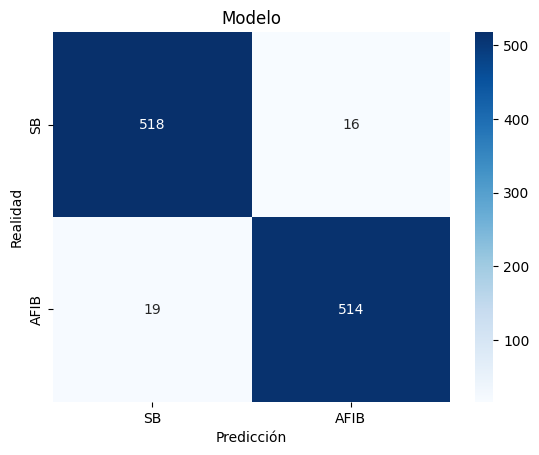

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(11, 98, 10),
                      activation='relu', solver=best_hps.get('solver'), max_iter=1000)
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)


print(f"\n=== Resultados modelo ===")
print("Entrenamiento:")
print(classification_report(y_train, predict_train, target_names=['SB', 'AFIB']))
print("\nValidación (Prueba):")
print(classification_report(y_test, predict_test, target_names=['SB', 'AFIB']))

cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['SB', 'AFIB'], yticklabels=['SB', 'AFIB'])
plt.title(f'Modelo')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Los resultados de <b>accuracy</b> para el modelo con los hiperparámetros seleccionados mediante TensorFlow no muestran mejoras significativas en comparación con los obtenidos al elegirlos de manera sencilla. Dado que el número de neuronas por capa es considerablemente mayor en la configuración seleccionada por TensorFlow, se concluye que es más eficiente utilizar los hiperparámetros inicialmente definidos, ya que logran resultados aceptables sin implicar un alto costo computacional.

##<h4><b>8. </b>Consultar cómo funciona, realizar y discutir un ejemplo con los datos del algoritmo de K means y Máquinas de Soporte Vectorial (SVM).</h4>

<b>K Means</b>

Es un algoritmo no supervisado ampliamente utilizado en aprendizaje automático para la exploración de patrones en datos mediante el agrupamiento (clustering). Su objetivo es dividir un conjunto de datos en subconjuntos llamados clústeres, los cuales se forman en función de las similitudes y/o distancias entre los datos. El algoritmo sigue los siguientes pasos:

- <b>Inicialización de centroides:</b> Se seleccionan de manera aleatoria k puntos iniciales que actúan como los centros de los clústeres, denominados centroides.

- <b>Asignación de datos a clústeres:</b> Se calculan las distancias euclidianas entre los datos y los centroides. Cada punto de datos se asigna al clúster cuyo centroide esté más cercano.

- <b>Reasignación de centroides:</b> Una vez asignados los datos a los clústeres, se calcula un nuevo centroide para cada uno de ellos. Este nuevo centroide se ubica en el promedio de todos los puntos pertenecientes a dicho clúster.

- <b>Iteración del algoritmo:</b> Los pasos de asignación de datos y actualización de centroides se repiten de manera iterativa. El proceso continúa hasta que los centroides no cambian significativamente entre iteraciones, lo que indica que el algoritmo ha convergedo a una solución estable y los clústeres están mejor definidos.

Este algoritmo es fácil de implementar en el análisis de datos de gran volumen, sin necesidad de definir etiquetas para las variables. No obstante, en algunos casos su interpretación es confusa dependiendo de la naturaleza de los datos y los parámetros con los que se estructura el algoritmo, como la inicialización de centroides y el número de clusters, afectan los resultados considerablemente y no siempre se cuenta con reglas para determinar los mejores valores.<br><br>

<b>Máquinas de Soporte Vectorial (SVM)</b>

Es un algoritmo de clasificación supervisado utilizado para identificar patrones y relaciones en datasets complejos, y puede adaptarse tanto para modelos de regresión como de clasificación. Este algoritmo busca un hiperplano óptimo que separe las clases en un espacio de características, maximizando la distancia entre los puntos de cada clase. Los tipos más comunes de SVM son los siguientes:

- <b>SVM Lineales:</b> Se emplea cuando los datos pueden separarse de manera lineal y no presentan alta dimensionalidad.
- <b>SVM con núcleos (kernels):</b> Se utiliza para separar clases no lineales mediante transformaciones de dimensionalidad basadas en principios de algoritmos como K Means y otros métodos aglomerativos.

Este algoritmo es especialmente eficaz en datos con alta dimensionalidad, ya que mejora la discriminación entre clases en comparación con K Means aplicado de manera aislada. Sin embargo, presenta un mayor costo computacional y, al combinarse con otros algoritmos de clustering, puede generar complicaciones en cuanto a la elección de los parámetros adecuados.<br><br>

A continuación se muestran ejemplos de implementación de estos algoritmos utilizando los datos de estudio.

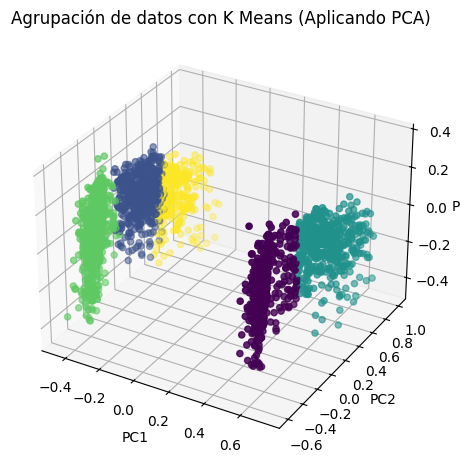

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_reduced)
kmeans_labels = kmeans.labels_

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title('Agrupación de datos con K Means (Aplicando PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

El algoritmo implementado genera dos clústeres globales, que pueden representar las distintas poblaciones presentes en los datos (SB y AFIB). Dado que el análisis detallado de componentes principales (PCA) y de la dimensionalidad no es un requerimiento específico de este proyecto, se opta por trabajar con 9 componentes principales (considerando que el dataset original cuenta con 11 características descriptivas), bajo la hipótesis de que estos explican la mayor parte de la variabilidad de los datos. Además, el número de clústeres se establece en 5, considerando que es el máximo número de grupos bien diferenciados que se puede obtener.

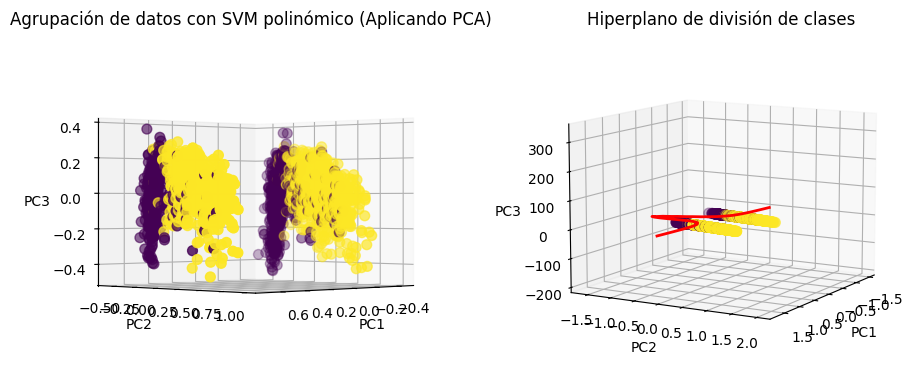

In [ ]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_train)

svm = SVC(kernel='poly', random_state=42)
svm.fit(X_reduced, y_train)

xx, yy = np.meshgrid(
    np.linspace(X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1, 30),
    np.linspace(X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1, 30)
)
zz = np.full_like(xx, fill_value=(X_reduced[:, 2].mean()))
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
decision_values = svm.decision_function(grid_points)
decision_values = decision_values.reshape(xx.shape)


fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train, cmap='viridis', s=50)
ax.set_title('Agrupación de datos con SVM polinómico (Aplicando PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=0, azim=45)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train, cmap='viridis', s=50)
ax.contour(xx, yy, decision_values, levels=[0], colors='red', linewidths=2)
ax.set_title('Hiperplano de división de clases')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=10, azim=30)
plt.tight_layout()
plt.show()

En la implementación del algoritmo de Máquinas de Soporte Vectorial (SVM), no se logran resultados óptimos en el clustering a nivel de cada grupo, debido a las limitaciones asociadas con la redimensión de los datos. Sin embargo, el modelo consigue identificar grupos separados a nivel global, correspondientes a las clases de patologías presentes en las muestras.

##<h4><b>9. </b>Hacer un informe con todos los puntos anteriores. En el informe incluir: Consultar por lo menos tres equipos comerciales que traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG y discutir brevemente las funcionalidades desde la teoría vista en el curso.</h4>


 - <b><i>AliveCor KardiaMobile:</i></b> Este dispositivo portátil permite a los usuarios monitorear su corazón y realizar un EKG  de una derivación utilizando un smartphone. KardiaMobile usa algoritmos avanzados para detectar las arritmias más frecuentes en 30 segundos, incluyendo la FA, la bradicardia, la taquicardia, las extrasístoles ventriculares (ESV), el ritmo sinusal con un intervalo QRS amplio y el ritmo sinusal con ectopia extrasistólica supraventricular <b>[13]</b>.

- <b><i>Philips PageWriter TC70:</i></b> El cardiógrafo ofrece una secuencia de informe ECG automatizada con transferencia integrada inalámbrica de ECGs, Integrado con el algoritmo DXL (Dynamic ECG Algorithm), proporciona interpretaciones ECG y un conjunto de ayudas avanzadas para el diagnóstico de STEMI para proporcionar una interpretación del ritmo, la morfología en una amplia variedad de poblaciones de pacientes e incluso la detección temprana de un infarto agudo de miocardio <b>[14]</b>.

- <b><i>Schiller CARDIOVIT AT-102 g2:</i></b> Incorpora el algoritmo interpretativo SCHILLER ECG Measurement and Interpretation Software. Ofrece análisis automático de ritmo y morfología. Además incluye un  módulo automatizado de interpretación de ECG diseñado para deportistas, y ha demostrado que  cuando se usa en pruebas de aptitud deportiva, reduce el número de falsos positivos en los resultados sin cambiar la sensibilidad para detectar cardiopatías <b>[15]</b>.

Los dispositivos comerciales como el <i>AliveCor KardiaMobile</i>, el </i>Philips PageWriter TC70</i> y el <i>Schiller CARDIOVIT AT-102 g2</i> incorporan algoritmos avanzados que aprovechan técnicas de procesamiento de señales para mejorar la precisión diagnóstica en el análisis de EKG. Sistemas como estos utilizan herramientas  para el procesamiento de las señales como puede ser: la transformada de Fourier para identificar patrones de frecuencia que indican arritmias o infartos, o la transformada de wavelet para realizar análisis multi-resolución, permitiendo detectar anomalías en diferentes escalas de la señal. Por otro lado, la implementación de filtros analógicos y digitales(como los vistos en el curso) son esenciales para el procesamiento de las señales, para reducir el ruido y mejorar la calidad de la señal. Además,  para los diagnósticos presentados es necesario realizar análisis estadísticos por ejemplo para  detectar variabilidad en los ritmos cardíacos que ayuda a distinguir entre patrones normales y patológicos. Estos algoritmos no solo facilitan el diagnóstico rápido y preciso, sino que también permiten detectar de manera temprana afecciones críticas como la fibrilación auricular, taquicardias, extrasístoles y el infarto agudo de miocardio, mejorando significativamente la eficiencia de los profesionales de la salud y el pronóstico de los pacientes.


La discusión de resultados se realiza en los numerales anteriores al final de cada sección.

<b><u>Conclusiones</u></b>

* La identificación de características descriptivas es crucial para desarrollar modelos predictivos con alta precisión fisiológica. En el caso de las enfermedades estudiadas, como la bradicardia sinusal y la fibrilación auricular, que se caracterizan por alteraciones en el ciclo y la frecuencia cardíaca, las variables más relevantes para incluir en el conjunto de datos serían aquellas relacionadas con las frecuencias de los latidos, la edad de los sujetos y otros factores asociados con las causas subyacentes de estas patologías.

*



#<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto4 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[4]:</b> M. Malik and A. J. Camm, "Heart rate variability: Analysis of physiological mechanisms," <i>Heart</i>, vol. 85, no. 5, pp. 535–541, May 2001. doi: 10.1136/heart.85.5.535.

<b>[5]:</b> GE Healthcare. (2023, Agosto 2). <i>A guide to ECG signal filtering</i>. GE HealthCare. https://www.gehealthcare.com/insights/article/a-guide-to-ecg-signal-filtering

<b>[6]:</b> Go AS, <i>et al</i>. (2019). "Prevalence of diagnosed atrial fibrillation in adults: national implications for rhythm management and stroke prevention." <i>JAMA</i>.

<b>[7]:</b> D'Souza A, <i>et al</i>. (2015). "Sinus bradycardia in trained athletes: evidence for a sport-specific subset of physiologic adaptation." <i>European Heart Journal</i>

<b>[8]:</b> January CT, <i>et al</i>. (2014). "2014 AHA/ACC/HRS guideline for the management of patients with atrial fibrillation." <i>Journal of the American College of Cardiology</i>.

<b>[9]:</b> Kusumoto FM, <i>et al</i>. (2019). "2018 ACC/AHA/HRS Guideline on the Evaluation and Management of Patients With Bradycardia." <i>Circulation</i>

<b>[10]:</b> Malik M, <i>et al</i>. (2019). "Heart rate variability: Standards of measurement, physiological interpretation, and clinical use." <i>European Heart Journal</i>.

<b>[11]:</b> Platonov PG. (2012). "P-wave morphology: underlying mechanisms and clinical implications." <i>Annals of Noninvasive Electrocardiology</i>.

<b>[12]:</b> Task Force of ESC. (2015). "Heart rate variability: standards of measurement, physiological interpretation and clinical use." <i>European Heart Journal</i>, 17:354-381.

<b>[13]:</b> “¿En qué se diferencian KardiaMobile y KardiaMobile 6L?” AliveCor [En línea]. Disponible: https://www.alivecor.es/blog/articles/whats-the-difference-between-kardiamobile-and-kardiamobile6l/

<b>[14]:</b> “Ver detalles de Philips Cardiógrafos PageWriter TC70”. Philips [En línea]. Disponible: https://www.centralamerica.philips.com/healthcare/product/HC860315/cardigrafos-pagewriter-tc70-cardigrafo

<b>[15]:</b> “SCHILLER | CARDIOVIT AT-102 G2”. SCHILLER: Swiss-designed innovative medical technology [En línea]. Disponible: https://www.schiller.ch/es-es/productos/cardiovit-at-102-g2-p190

<b>[16]:</b> TensorFlow. (n.d.). <i>Keras Tuner: Optimización de hiperparámetros con Keras</i>. TensorFlow. https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=es-419